## Observations and Insights 

Capomulin was the most effective regimen in reducing tumor size.
A strong correlation (0.84) exists between weight and tumor volume.
Ketapril, Naftisol, Stelasyn and Zoniferol had larger average tumor volume than Placebo, which signals these drugs were not only ineffective but potentially more harmful.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [32]:
# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [33]:
# This is a join check
pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer").isnull().sum()

Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
dtype: int64

In [34]:
# Checking the number of mice in the DataFrame.
merged_df["Mouse ID"].nunique()

249

In [80]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_df = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
dupe_mouse_ids = dupes_df["Mouse ID"].unique()
dupe_mouse_ids

array(['g989'], dtype=object)

In [81]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduped_df = merged_df[merged_df['Mouse ID'].isin(dupe_mouse_ids)==False]
deduped_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [78]:
# Checking the number of mice in the clean DataFrame.
deduped_df["Mouse ID"].nunique()

248

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
mouse_stats = deduped_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
tumor_mean = mouse_stats.mean()
tumor_median = mouse_stats.median()
tumor_variance = mouse_stats.var()
tumor_std = mouse_stats.std()
tumor_sem = mouse_stats.sem()

pd.DataFrame({"Tumor Mean" : tumor_mean,
             "Tumor Median" : tumor_median,
             "Tumor Variance" : tumor_variance,
             "Tumor Standard Deviation" : tumor_std,
             "Tumor SEM" : tumor_sem})

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
deduped_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)' : [sum, 'count', 'mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                         \
                            sum count       mean     median        var   
Drug Regimen                                                             
Capomulin           9355.420462   230  40.675741  41.557809  24.947764   
Ceftamin            9361.228582   178  52.591172  51.776157  39.290177   
Infubinol           9413.493529   178  52.884795  51.820584  43.128684   
Ketapril           10384.299876   188  55.235638  53.698743  68.553577   
Naftisol           10105.671026   186  54.331565  52.509285  66.173479   
Placebo             9780.078122   181  54.033581  52.288934  61.168083   
Propriva            7743.497619   148  52.320930  50.446266  43.852013   
Ramicane            9169.417875   228  40.216745  40.673236  23.486704   
Stelasyn            9816.199991   181  54.233149  52.431737  59.450562   
Zoniferol           9689.044192   182  53.236507  51.818479  48.533355   

                                  
                   std       sem  
Drug Regimen                      
Capomulin     4.994774  0.329346  
Ceftamin      6.268188  0.469821  
Infubinol     6.567243  0.492236  
Ketapril      8.279709  0.603860  
Naftisol      8.134708  0.596466  
Placebo       7.821003  0.581331  
Propriva      6.622085  0.544332  
Ramicane      4.846308  0.320955  
Stelasyn      7.710419  0.573111  
Zoniferol     6.966589  0.516398

## Bar Plots

In [85]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mouse_stats_time = deduped_df.groupby(["Drug Regimen"])["Mouse ID"].count()
mouse_stats_time

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

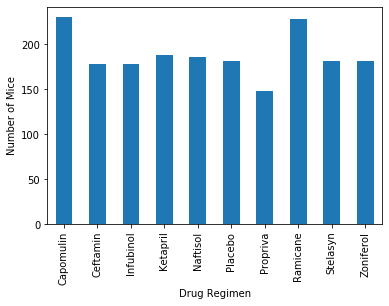

In [86]:
mouse_stats_time.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize']=10
plt.ylabel("Number of Mice")
plt.show()


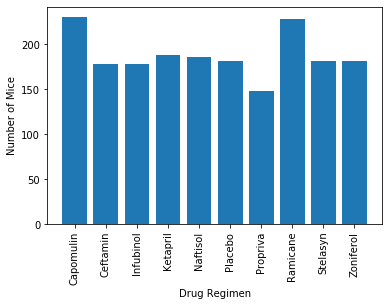

In [87]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(mouse_stats_time.index.values,mouse_stats_time.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize']=10
plt.ylabel("Number of Mice")
plt.show()

## Pie Plots

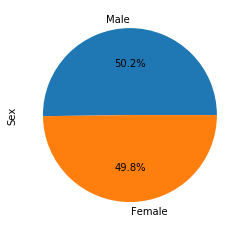

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata["Sex"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

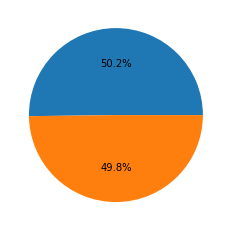

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_metadata["Sex"].value_counts(), autopct='%1.1f%%')
plt.show()

In [92]:
mouse_metadata["Sex"].value_counts()

Male      125
Female    124
Name: Sex, dtype: int64

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determined the last timepoint for each mouse
max_timepoint_df= deduped_df.groupby(["Mouse ID"]).max()


max_timepoint_df = max_timepoint_df.reset_index()
max_timepoint_df.head()

# Get the matcing tumor volume for the last timepoint for each mouse by merging this df with the oringial df
max_tumor_df = max_timepoint_df[["Mouse ID", "Timepoint"]].merge(deduped_df, on=["Mouse ID", "Timepoint"], how="left")
max_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [110]:
# Make a separate data frame for each of the top 4 promising regimen

capomulin = max_tumor_df[max_tumor_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = max_tumor_df[max_tumor_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
ceftamin = max_tumor_df[max_tumor_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
infubinol = max_tumor_df[max_tumor_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
placebo = max_tumor_df[max_tumor_df["Drug Regimen"] == "Placebo"]['Tumor Volume (mm3)']

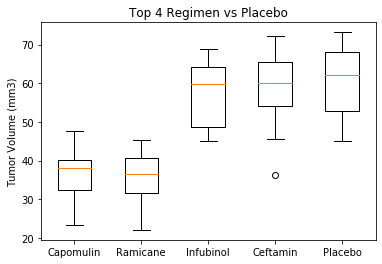

In [111]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin, ramicane, ceftamin, infubinol, placebo], labels=['Capomulin','Ramicane','Infubinol','Ceftamin','Placebo'])
plt.title("Top 4 Regimen vs Placebo")
plt.ylabel("Tumor Volume (mm3)") 
plt.show()

In [120]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Capomulin.
capomulin_quartiles = capomulin.quantile(q=[.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lowerb = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_upperb = capomulin_upperq + (1.5 * capomulin_iqr)
capomulin_outliers = capomulin[(capomulin < capomulin_lowerb) | (capomulin > capomulin_upperb)]
print(f"Capomulin Outliers: {capomulin_outliers}")

Capomulin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [121]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Ramicane.
ramicane_quartiles = ramicane.quantile(q=[.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lowerb = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_upperb = ramicane_upperq + (1.5 * ramicane_iqr)
ramicane_outliers = ramicane[(ramicane < ramicane_lowerb) | (ramicane > ramicane_upperb)]
print(f"Ramicane Outliers: {ramicane_outliers}")

Ramicane Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [122]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Infubinol.
infubinol_quartiles = infubinol.quantile(q=[.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lowerb = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_upperb = infubinol_upperq + (1.5 * infubinol_iqr)
infubinol_outliers = infubinol[(infubinol < infubinol_lowerb) | (infubinol > infubinol_upperb)]
print(f"Infubinol Outliers: {infubinol_outliers}")

Infubinol Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [123]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin.
ceftamin_quartiles = ceftamin.quantile(q=[.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lowerb = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_upperb = ceftamin_upperq + (1.5 * ceftamin_iqr)
ceftamin_outliers = ceftamin[(ceftamin < ceftamin_lowerb) | (ceftamin > ceftamin_upperb)]
print(f"Ceftamin Outliers: {ceftamin_outliers}")

Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

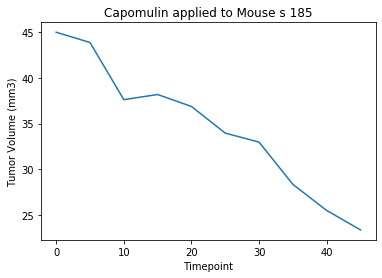

In [125]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = deduped_df[deduped_df['Drug Regimen'] == 'Capomulin']
capomulin_s185_df = capomulin_df[capomulin_df['Mouse ID'] == 's185']
plt.plot(capomulin_s185_df['Timepoint'], capomulin_s185_df['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin applied to Mouse s185")
plt.show()

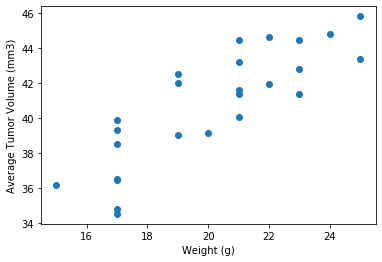

In [126]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_scat = capomulin_df.groupby("Mouse ID").mean()
weight = capo_scat['Weight (g)']
tumor = capo_scat['Tumor Volume (mm3)']
plt.scatter(x=weight, y=tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [118]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


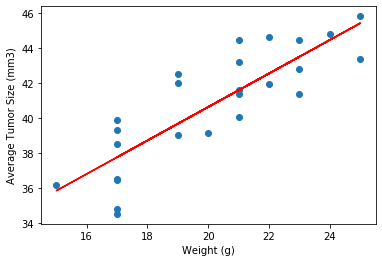

In [119]:
x_values = weight
y_values = tumor
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Size (mm3)')
plt.show()